In [1]:
!pip3 install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00


In [10]:
!pip3 install qiskit-aer

QOSF Mentee Application: Task 3 (Quantum Error Correction) --> For simplicity, assume with only 1 qubit in the circuit

In [21]:
from qiskit import transpile
from qiskit.circuit.library import RealAmplitudes
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
import numpy as np
from qiskit import QuantumCircuit
import random
from qiskit.visualization import plot_histogram

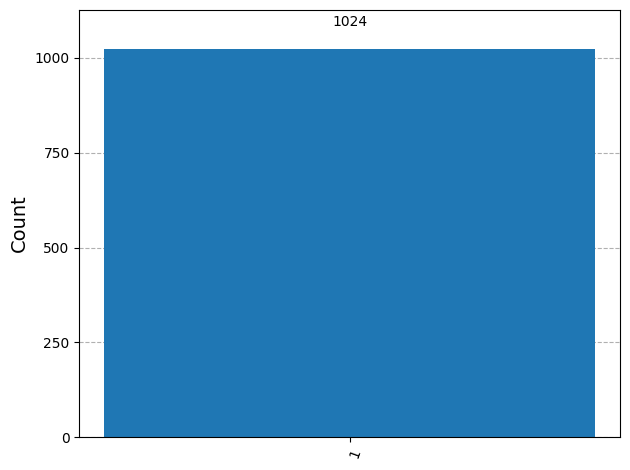

In [29]:
def noise_model(a,b,circuit):
  if not (0<=a<=1):
    return
  if(random.random() >=a):
    circuit.x(0)


qc = QuantumCircuit(1)
noise_model(.5,1.,qc)
qc.measure_all()

backend = AerSimulator()
tc = transpile(qc,backend)

result = backend.run(tc).result()
plot_histogram(result.get_counts(0))

In [24]:
#Now, we apply the repetition code
#We encode |0> as |000> and |1> as |111>
#Additionally, we have 2 ancilla qubits to decode
#Finally, we use majority voting (if 2 of three are 0, we call that 000 and vice versa)

